# Exploratory Data Analysis Code

## Prep

In [2]:
# General libraries.
import os 
import sys
import re
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import itemfreq

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

# For Data Viz
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools


from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

#import xgboost as xgb
import random
from sklearn import model_selection, preprocessing, ensemble
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans


C:\Users\fan\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\fan\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
train_df = pd.read_json("../Kaggle Files/train.json")
test_df = pd.read_json("../Kaggle Files/test.json")

#align by listing ids
train_df = train_df.set_index('listing_id')
test_df = test_df.set_index('listing_id')


# Data Visualization Begin

In [4]:
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,longitude,manager_id,photos,price,street_address
listing_id,,,,,,,,,,,,,,
7211212,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
7150865,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
6887163,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
6888711,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
6934781,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [5]:
test_df.head().T

listing_id,7142618,7210040,7103890,7143442,6860601
bathrooms,1,1,1,1,2
bedrooms,1,2,1,2,2
building_id,79780be1514f645d7e6be99a3de696c5,0,3dbbb69fd52e0d25131aa1cd459c87eb,783d21d013a7e655bddc4ed0d461cc5e,6134e7c4dd1a98d9aee36623c9872b49
created,2016-06-11 05:29:41,2016-06-24 06:36:34,2016-06-03 04:29:40,2016-06-11 06:17:35,2016-04-12 05:24:17
description,Large with awesome terrace--accessible via bed...,Prime Soho - between Bleecker and Houston - Ne...,New York chic has reached a new level ...,Step into this fantastic new Construction in t...,"~Take a stroll in Central Park, enjoy the ente..."
display_address,Suffolk Street,Thompson Street,101 East 10th Street,South Third Street\r,"Midtown West, 8th Ave"
features,"[Elevator, Laundry in Building, Laundry in Uni...","[Pre-War, Dogs Allowed, Cats Allowed]","[Doorman, Elevator, No Fee]","[Roof Deck, Balcony, Elevator, Laundry in Buil...","[Common Outdoor Space, Cats Allowed, Dogs Allo..."
latitude,40.7185,40.7278,40.7306,40.7109,40.765
longitude,-73.9865,-74,-73.989,-73.9571,-73.9845
manager_id,b1b1852c416d78d7765d746cb1b8921f,d0b5648017832b2427eeb9956d966a14,9ca6f3baa475c37a3b3521a394d65467,0b9d5db96db8472d7aeb67c67338c4d2,b5eda0eb31b042ce2124fd9e9fcfce2f


### Shape of Data

In [6]:
train_df.shape

(49352, 14)

### Variable Identification

In [7]:
train_df.info

<bound method DataFrame.info of             bathrooms  bedrooms                       building_id  \
listing_id                                                          
7211212           1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
7150865           1.0         2  c5c8a357cba207596b04d1afd1e4f130   
6887163           1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
6888711           1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
6934781           1.0         4                                 0   
6894514           2.0         4  38a913e46c94a7f46ddf19b756a9640c   
6930771           1.0         2  3ba49a93260ca5df92fde024cb4ca61f   
6867392           2.0         1  0372927bcb6a0949613ef5bf893bbac7   
6898799           1.0         1  a7efbeb58190aa267b4a9121cd0c88c0   
6814332           2.0         4                                 0   
6869199           1.0         0                                 0   
7102986           1.0         1                                 0   
68

In [8]:
train_df.describe()

,bathrooms,bedrooms,latitude,longitude,price
count,49352.00000,49352.000000,49352.000000,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,0.000000,4.490000e+06


In [9]:
g = train_df.groupby('interest_level')
g.describe(include = 'all')

bathrooms      bedrooms building_id  \
interest_level                                                  
high           25%         1.000000      1.000000         NaN   
               50%         1.000000      2.000000         NaN   
               75%         1.000000      2.000000         NaN   
               count    3839.000000   3839.000000        3839   
               freq             NaN           NaN         195   
               max         4.000000      5.000000         NaN   
               mean        1.116176      1.546496         NaN   
               min         0.000000      0.000000         NaN   
               std         0.341725      1.112187         NaN   
               top              NaN           NaN           0   
               unique           NaN           NaN        2065   
low            25%         1.000000      1.000000         NaN   
               50%         1.000000      1.000000         NaN   
               75%         1.000000      2.000000         NaN   
               count   34284.000000  34284.000000       34284   
               freq             NaN           NaN        7588   
               max        10.000000      8.000000         NaN   
               mean        1.238741      1.514759         NaN   
               min         0.000000      0.000000         NaN   
               std         0.544946      1.111595         NaN   
               top              NaN           NaN           0   
               unique           NaN           NaN        5224   
medium         25%         1.000000      1.000000         NaN   
               50%         1.000000      2.000000         NaN   
               75%         1.000000      2.000000         NaN   
               count   11229.000000  11229.000000       11229   
               freq             NaN           NaN         503   
               max         4.000000      7.000000         NaN   
               mean        1.163906      1.622050         NaN   
               min         0.000000      0.000000         NaN   
               std         0.388318      1.122604         NaN   
               top              NaN           NaN           0   
               unique           NaN           NaN        3888   

                                   created description display_address  \
interest_level                                                           
high           25%                     NaN         NaN             NaN   
               50%                     NaN         NaN             NaN   
               75%                     NaN         NaN             NaN   
               count                  3839        3839            3839   
               freq                      2          43              38   
               max                     NaN         NaN             NaN   
               mean                    NaN         NaN             NaN   
               min                     NaN         NaN             NaN   
               std                     NaN         NaN             NaN   
               top     2016-05-11 04:59:33                    Broadway   
               unique                 3834        3413            2136   
low            25%                     NaN         NaN             NaN   
               50%                     NaN         NaN             NaN   
               75%                     NaN         NaN             NaN   
               count                 34284       34284           34284   
               freq                      3        1517             296   
               max                     NaN         NaN             NaN   
               mean                    NaN         NaN             NaN   
               min                     NaN         NaN             NaN   
               std                     NaN         NaN             NaN   
               top     2016-06-21 04:44:43                    Broadway   
               unique                33842      

In [10]:
train_df.corr()

,bathrooms,bedrooms,latitude,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,-0.966807,-0.000707
longitude,0.010393,0.006892,-0.966807,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,-0.000087,1.000000


### Interest Level

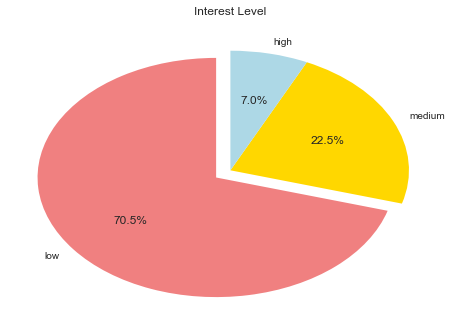

In [20]:
#target variable
labels = ["low","medium","high"]
sizes = train_df.interest_level.value_counts().values
explode=[0.1,0,0]
colors = [  'lightcoral','gold','lightblue']
patches, texts,autotexts= plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%",
                        startangle=90)
plt.title("Interest Level")
plt.show()

### Price

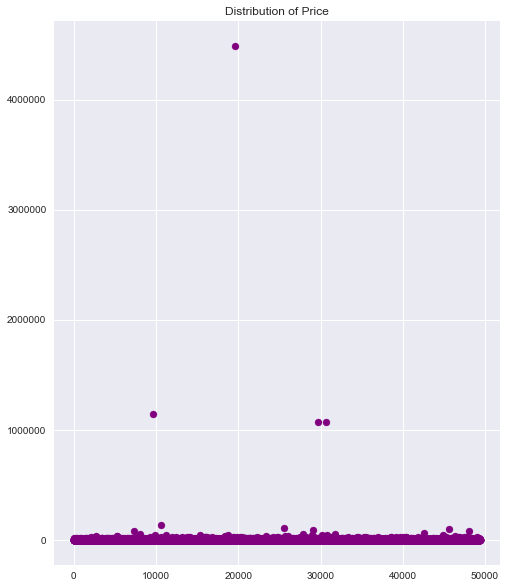

In [11]:
plt.figure(figsize=(8, 10))
plt.scatter(range(train_df.shape[0]), train_df["price"].values,color='purple')
plt.title("Distribution of Price");

C:\Users\fan\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



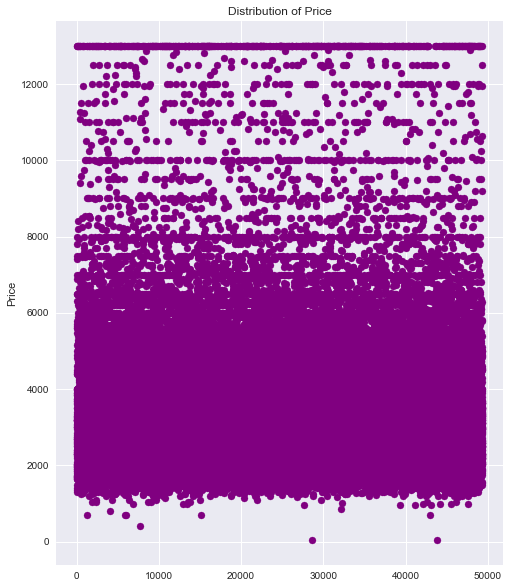

In [12]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit


plt.figure(figsize=(8, 10))
plt.scatter(range(train_df.shape[0]), train_df["price"].values,color='purple')
plt.ylabel("Price")
plt.title("Distribution of Price");

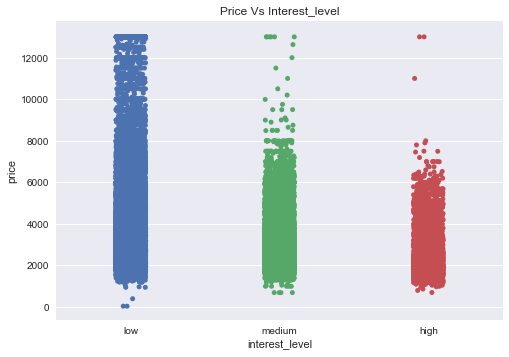

In [13]:
order = ['low', 'medium', 'high']
sns.stripplot(train_df["interest_level"],train_df["price"],jitter=True,order=order)
plt.title("Price Vs Interest_level");